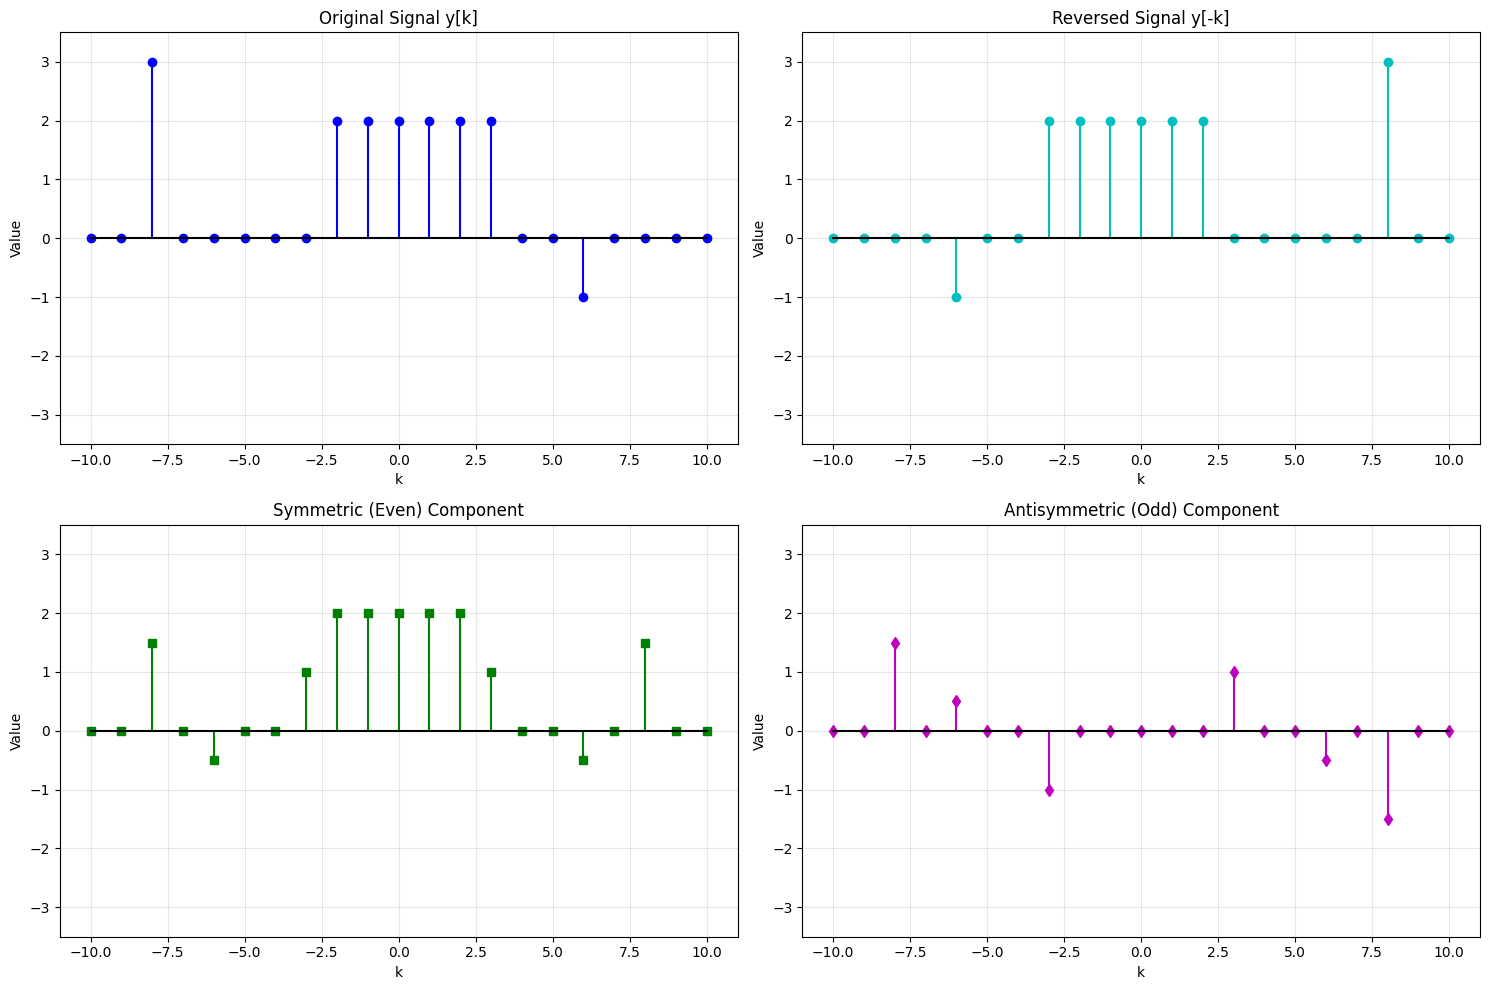

Max reconstruction error: 0.00e+00
Symmetric part check: True
Antisymmetric part check: True


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def reverse_signal(sig):
    return sig[::-1]

def symmetric_part(sig, sig_rev):
    return (sig + sig_rev) / 2

def antisymmetric_part(sig, sig_rev):
    return (sig - sig_rev) / 2

k = np.arange(-10, 11)
y = np.zeros_like(k, dtype=float)

y[(k >= -2) & (k <= 3)] = 2.0     
y[k == 6] = -1.0                  
y[k == -8] = 3.0                  

# Compute reversed, symmetric, and antisymmetric parts
y_rev = reverse_signal(y)
y_sym = symmetric_part(y, y_rev)
y_asym = antisymmetric_part(y, y_rev)

# Plotting
plt.figure(figsize=(15, 10))

# Original
plt.subplot(2, 2, 1)
plt.stem(k, y, linefmt='b-', markerfmt='bo', basefmt='k-')
plt.title("Original Signal y[k]")
plt.xlabel("k")
plt.ylabel("Value")
plt.grid(True, alpha=0.3)
plt.ylim(-3.5, 3.5)

# Reversed
plt.subplot(2, 2, 2)
plt.stem(k, y_rev, linefmt='c-', markerfmt='co', basefmt='k-')
plt.title("Reversed Signal y[-k]")
plt.xlabel("k")
plt.ylabel("Value")
plt.grid(True, alpha=0.3)
plt.ylim(-3.5, 3.5)

# Symmetric (Even)
plt.subplot(2, 2, 3)
plt.stem(k, y_sym, linefmt='g-', markerfmt='gs', basefmt='k-')
plt.title("Symmetric (Even) Component")
plt.xlabel("k")
plt.ylabel("Value")
plt.grid(True, alpha=0.3)
plt.ylim(-3.5, 3.5)

# Antisymmetric (Odd)
plt.subplot(2, 2, 4)
plt.stem(k, y_asym, linefmt='m-', markerfmt='md', basefmt='k-')
plt.title("Antisymmetric (Odd) Component")
plt.xlabel("k")
plt.ylabel("Value")
plt.grid(True, alpha=0.3)
plt.ylim(-3.5, 3.5)

plt.tight_layout()
plt.show()

# Verification
y_reconstructed = y_sym + y_asym
error = np.max(np.abs(y - y_reconstructed))

print(f"Max reconstruction error: {error:.2e}")
print(f"Symmetric part check: {np.allclose(y_sym, y_sym[::-1])}")
print(f"Antisymmetric part check: {np.allclose(y_asym, -y_asym[::-1])}")
